## 3. Model Evaluation

### a)

In [1]:
import pandas as pd

In [2]:
headers = ["Number of times pregnant",
           "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
           "Diastolic blood pressure (mm Hg)",
           "Triceps skinfold thickness (mm)",
           "2-Hour serum insulin (mu U/ml)",
           "Body mass index (weight in kg/(height in m)^2)",
           "Diabetes pedigree function",
           "Age (years)",
           "Class variable(0 or 1)"]

raw_df = pd.read_csv('Diabetes.csv', names= headers)
print(raw_df.shape)
raw_df.head(6)

(768, 9)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
ابتدا یک لیست از اسامی هدر ها ایجاد کرده و سپس فایل csv را به کمک ان فراخوانی می کنیم 
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


#### Handling Missing Values

In [3]:
raw_df.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable(0 or 1)                                                      0
dtype: int64

In [4]:
raw_df['Class variable(0 or 1)'].value_counts()

0    500
1    268
Name: Class variable(0 or 1), dtype: int64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
 همانطور که مشخص است داده missing در دیتاست وجود ندارد.
  همینطور با توجه به محموع تعداد هرکدام از مقادیر یکتا که برابر است به تعداد کل رکوردها می توان فهمید که در ستون کلاس null نداریم.
    این تحلیل را برای سایر ستون ها هم می توان انجام داد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


#### Normalizing Numerical Columns and Encoding Categorical Ones

In [5]:
raw_df.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skinfold thickness (mm)                                               int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable(0 or 1)                                                        int64
dtype: object

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
متغیر کتگوریکال نداریم پس نیازی به انکود نیست
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


In [6]:
from sklearn.preprocessing import normalize

In [7]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'])
categoricals = pd.DataFrame(raw_df['Class variable(0 or 1)'])


#remove outlires
print("Before Removing Outliers: ",raw_df.shape)
Q1 = raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'].quantile(0.25)
Q3 = raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'].quantile(0.75)
IQR = Q3 - Q1 
mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("#Outliers = ",raw_df[~mask].dropna().shape[0])
print("#Not outliers = ",raw_df.shape[0]-raw_df[~mask].dropna().shape[0])

raw_df= raw_df[mask]
print("After Removing Outliers: ",raw_df.shape)
raw_df.head()


Before Removing Outliers:  (768, 9)
#Outliers =  129
#Not outliers =  639
After Removing Outliers:  (639, 9)


<ipython-input-7-b4fd3b422372>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-7-b4fd3b422372>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [8]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'])
categoricals = pd.DataFrame(raw_df['Class variable(0 or 1)'])

#normalize
raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'] = normalize(numericals, norm='l2')
df=raw_df
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
5,0.034911,0.809934,0.516682,0.000000,0.000000,0.178744,0.001403,0.209466,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
با جزئیاتی کاملا مشابه سوال قبل حذف داده های پرت و نرمال سازی انجام شده است.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


In [9]:
Y = df['Class variable(0 or 1)']
X = df.drop('Class variable(0 or 1)', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
print('Distribution of defferent classes in training data:(%) ')
y = pd.DataFrame(y_train)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_train.shape[0])*100

Distribution of defferent classes in training data:(%) 


Class variable(0 or 1)
0    68.88454
1    31.11546
Name: Class variable(0 or 1), dtype: float64

In [13]:
print('Distribution of defferent classes in test data:(%) ')
y = pd.DataFrame(y_test)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_test.shape[0])*100

Distribution of defferent classes in test data:(%) 


Class variable(0 or 1)
0    67.96875
1    32.03125
Name: Class variable(0 or 1), dtype: float64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک تابع  train_test_split داده ها را به دو بخش آموزشی و تست با نسبت خواسته شده تقسیم می کنیم.سپس درصد وجود هر کلاس را در داده های آموزش و تست محاسبه می کنیم.
    همانطور که مشحص است هر کدام از این دسته ها درصدهای نزدیک به همی در دو نوع داده دارند
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
myclassifier = RandomForestClassifier(max_depth=5, criterion='entropy').fit(X_train, y_train)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
کلاسیفایر جنگل تصادفی را با پارامترهای گفته شده در سوال می سازیم .
    سپس داده ها را برای آموزش به مدل دادیم.

</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### b)

In [16]:
y_pred = myclassifier.predict(X_test)

### c)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns

In [18]:
print("[+] confusion matrix\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)


[+] confusion matrix

[[85  2]
 [29 12]]


<AxesSubplot:>

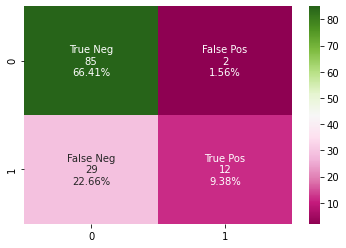

In [19]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap="PiYG")

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
    
    
    به طور کلی ، برای یک طبقه بندی باینری ، یک ماتریس confusion یک ماتریس 2x2 بعدی با 0 به عنوان کلاس منفی و 1 به عنوان کلاس مثبت است.
    در این ماتریس برای یک ظبقه بندی خوب باید عناصر قطر اصلی اعداد بزرگ و قطر فرعی کوچک باشند.
    به هر یک از این خانه ها یکی از نامهایی که در نمودار فوق مشخص است اطلاق می شود.
    منظور از True Negative این است که نتیجه منفی بوده و به درستی منفی پیش بینی شده است.
        منظور از True Positive این است که نتیجه مثبت بوده و به درستی مثبت پیش بینی شده است.
    منظور از False Negative این است که نتیجه مثبت بوده و به اشتباه منفی پیش بینی شده است.
    منظور از False Positive این است که نتیجه منفی بوده و به اشتباه مثبت پیش بینی شده است.
    برای هرکدام از آنها یک نرخ به صورت زیر تعریف می شود:

</p>

<p style =" direction:ltr;text-align:left;">
True Positive Rate (TPR): True Positive / Total Positive = TP/P</p>
<p style =" direction:ltr;text-align:left;">
True Negative Rate (TNR): True Negative/ Total Negative = TN/N</p>
<p style =" direction:ltr;text-align:left;">
False Positive Rate (FPR): False Positive / Total Negative = FP/N</p>
<p style =" direction:ltr;text-align:left;">
False Negative Rate (FNR): False Negative/ Total Positive= FN/P</p>

<p style =" direction:rtl;text-align:right;">
 برای یک مدل خوب TPRوTNR باید بالا و دو شاخص دیگر باید پایین باشند.
همچنین داریم :
</p>
<p style =" direction:ltr;text-align:left;">
Precision = TP / (TP+FP)</p>





<p style =" direction:rtl;text-align:right;">


    در نمودار بالا برای کلاس 0 در محموع 87 تست انجام شده است که 85 داده به درستی 0 و 2 داده به اشتباه 1 تشخیص داده شده اند
</p>
<p style =" direction:rtl;text-align:right;">


    در نمودار بالا برای کلاس 1در محموع 41 تست انجام شده است که 12 داده به درستی 1 و 29 داده به اشتباه 0 تشخیص داده شده اند
</p>
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


###  d)

In [20]:
print("\n[+] classification report\n")
print(classification_report(y_test, y_pred))


[+] classification report

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        87
           1       0.86      0.29      0.44        41

    accuracy                           0.76       128
   macro avg       0.80      0.63      0.64       128
weighted avg       0.78      0.76      0.71       128



<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


<p style =" direction:rtl;text-align:right;">
ستون recall به معنای این است که چع تغداد از این کلاس را می توان بین تمام عناصر این کلاس یافت.  
    یعنی توانایی تشخیص مدل برای ستون های مثبت چند است.
    <div>Recall = TP/(TP+FN)</div>
</p>
<p style =" direction:rtl;text-align:right;">
 ستون precision به این معناست که چه تعداد از این کلاس به درستی دسته بندی شده اند.  
    یعنی یک کلاسیفایر چقدر می تواند در اینکه یک نمونه منفی را مثبت برچسب نزند موفق عمل می کند.
    <div>Precision = TP/(TP + FP)</div>

</p>
<p style =" direction:rtl;text-align:right;">
    ستونf1-score میانگین هارمونیک دو ستون قبل است.
    یعنی چه تعداد از نمونه های مثبت به درستی حدس زده شده اند.
    <div>F1 Score = 2*(Recall * Precision) / (Recall + Precision)</div>
</p>
<p style =" direction:rtl;text-align:right;">
    ستون support تعداد وقوغ یک کلاس در دیتاست است
</p>
<p style =" direction:rtl;text-align:right;">
از دو ستون اول در دیتاست هایی که بالانس نیستند و دقت در آنها چندان معنی دار نیست استفاده می شود.
    
</p>
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">
